# Выделение групп пользователей на основе поведения в мобильном приложении "Ненужные вещи"

## 1. Загрузка файлов с данными

In [1]:
# импортирую библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from scipy import stats as st
import math as mth

## 2. Предобработка данных

### 2.1. Данные об источниках

In [3]:
# напишу функцию базовых проверок: вывод на экран, общая информация, явные дубликаты
def df_info (data):
    display(data.head())
    display(data.info())
    display(data.duplicated().sum())

In [4]:
# изучу информацию данных об источниках
df_info (mobile_sourсes)

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

0

Изучив полученную информацию можно сказать следующее:
    
- Наименование столбца `userId` некорректное, слудует привести его в соответвии со стилем кода.
- Явных дубликатов нет.
- Типы данных столбцов приемлемы.
- В данных пропусков нет.

In [5]:
# привожу наименование столбца в корректный вид
mobile_sourсes = mobile_sourсes.rename(columns = {'userId':'user_id'})

### 2.2. Данные о событиях

In [6]:
# изучу информацию данных о событиях
df_info (mobile_dataset)

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

0

Изучив полученную информацию можно сказать следующее:
    
- Наименования столбцов `event.time`, `event.name`, `user.id` некорректные, слудует привести их в соответвии со стилем кода.
- Явных дубликатов нет.
- Типы данных столбца `event.time` необходимо привести к типу даты.
- В данных нет пропусков.

In [7]:
# изменяю наименование некоторых столюцов
mobile_dataset.columns = ['event_time', 'event_name', 'user_id']

# преобразовываю данные о времени в необходимый для работы тип
#mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time']).astype('datetime64[s]')
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'])

В датасете встречаются одинаковые события с разными наименованиями. Для корректной анализа данных необходимо привети названия событий в нормальное состояние.

In [8]:
# переименую повторяющиеся наименования событий
mobile_dataset['event_name'] = mobile_dataset['event_name'].str.replace('contacts_show', 'show_contacts', regex=True)
mobile_dataset = mobile_dataset.replace(['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7'], 'search')
sorted(mobile_dataset['event_name'].unique())

['advert_open',
 'contacts_call',
 'favorites_add',
 'map',
 'photos_show',
 'search',
 'show_contacts',
 'tips_click',
 'tips_show']

### 2.3. Объединение таблиц

In [9]:
# объединю две таблицы
df = pd.merge(mobile_sourсes, mobile_dataset, on='user_id', how='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74197 entries, 0 to 74196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     74197 non-null  object        
 1   source      74197 non-null  object        
 2   event_time  74197 non-null  datetime64[ns]
 3   event_name  74197 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.8+ MB


In [10]:
# определю максимальную и минимальную даты
min_date = df['event_time'].min()
max_date = df['event_time'].max()
print(f'В таблице данные за период с {min_date} по {max_date}')

В таблице данные за период с 2019-10-07 00:00:00.431357 по 2019-11-03 23:58:12.532487


**ОБЩИЙ ВЫВОД ПО РАЗДЕЛУ:**
В таблице `mobile_sourсes` наименование столбца `userId` некорректное, слудует привести его в соответвии со стилем кода.
В таблице `mobile_dataset` наименования столбцов `event.time`, `event.name`, `ser.id` некорректные, слудует привести их в соответвии со стилем кода. Также типы данных столбца `event.time` необходимо привести к типу даты. **Выполнены все преобразования и данные приведены в нормальное состояние**
    
Явных дубликатов нет, пропусков нет. В датасете встречаются одинаковые события с разными наименованиями. Для корректного анализа данных названия этих событий изменены.

Данные за период с 2019-10-07 00:00:00 по 2019-11-03 23:58:12

## 3. Исследовательский анализ данных

### 3.1. Retention Rate.

In [11]:
# создаю профели пользователей
profiles = (
        df.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg({'event_time': 'first'})
        .rename(columns={'event_time': 'first_time'})
        .reset_index()
    )
#profiles['first_time'] = profiles['first_time'].dt.date
#profiles['first_month'] = profiles['first_time'].astype('datetime64[M]')
show_contacts = df.query('event_name == "show_contacts"')['user_id'].reset_index()
profiles['show'] = profiles['user_id'].isin(show_contacts['user_id'].unique())
profiles = profiles.merge(df, on='user_id', how='left')
#profiles['event_time'] = profiles['event_time'].dt.date

profiles.head(2)

,user_id,first_time,show,source,event_time,event_name
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,False,other,2019-10-07 13:39:45.989359,tips_show
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,False,other,2019-10-07 13:40:31.052909,tips_show


In [12]:
# добавляю два столбца - первая неделя и неделя активности
profiles['activ_week'] = (pd.to_datetime(profiles['event_time'],
                                                unit='d') - pd.to_timedelta(profiles['event_time'].dt.dayofweek, unit='d')).dt.date
profiles['first_week'] = (pd.to_datetime(profiles['first_time'],
                                                      unit='d') - pd.to_timedelta(profiles['first_time'].dt.dayofweek, unit='d')).dt.date
profiles.head(2)

,user_id,first_time,show,source,event_time,event_name,activ_week,first_week
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,False,other,2019-10-07 13:39:45.989359,tips_show,2019-10-07,2019-10-07
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,False,other,2019-10-07 13:40:31.052909,tips_show,2019-10-07,2019-10-07


In [13]:
# рассчитаю lifetime
profiles['lifetime'] = (profiles['activ_week'] - profiles['first_week']).dt.days
profiles.head(2)

,user_id,first_time,show,source,event_time,event_name,activ_week,first_week,lifetime
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,False,other,2019-10-07 13:39:45.989359,tips_show,2019-10-07,2019-10-07,0
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,False,other,2019-10-07 13:40:31.052909,tips_show,2019-10-07,2019-10-07,0


In [14]:
# рассчитываем удержание
cohorts = profiles.groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort_sizes = (
        profiles.groupby('first_week')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
        .reset_index()
    )   
cohorts = cohort_sizes.merge(cohorts, on='first_week', how='left').fillna(0)
#cohorts['first_week'] = pd.to_datetime(cohorts['first_week'])

#Посчитаем Retention Rate. 
#Разделим количество активных пользователей в каждую из недель на исходное число пользователей в когорте
cohorts['retention'] = cohorts['user_id']/cohorts['cohort_size']
cohorts

,first_week,cohort_size,lifetime,user_id,retention
0,2019-10-07,1130,0,1130,1.000000
1,2019-10-07,1130,7,272,0.240708
2,2019-10-07,1130,14,170,0.150442
3,2019-10-07,1130,21,119,0.105310
4,2019-10-14,1166,0,1166,1.000000
5,2019-10-14,1166,7,282,0.241852
6,2019-10-14,1166,14,155,0.132933
7,2019-10-21,1094,0,1094,1.000000
8,2019-10-21,1094,7,239,0.218464
9,2019-10-28,903,0,903,1.000000


In [15]:
# составлю сводную таблицу удержания по неделям
retention = cohorts.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum').reset_index()
retention

lifetime,first_week,0,7,14,21
0,2019-10-07,1.0,0.240708,0.150442,0.10531
1,2019-10-14,1.0,0.241852,0.132933,NaN
2,2019-10-21,1.0,0.218464,NaN,NaN
3,2019-10-28,1.0,NaN,NaN,NaN


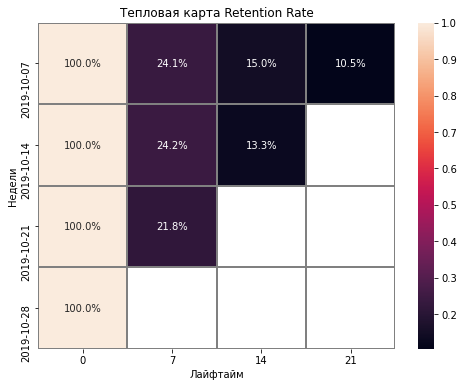

In [16]:
# визуализирую полученные данные
plt.figure(figsize=(8,6))
sns.heatmap(
    cohorts.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum'), 
    annot=True, 
    fmt='.1%',
    linewidths=1,
    linecolor='gray'
)
plt.title('Тепловая карта Retention Rate')
plt.xlabel('Лайфтайм')
plt.ylabel('Недели')
plt.show()

**Вывод:** В первую неделю у когорт 7.10-13.10 и 14.10-20.10 удержание почти одинаковое - 24.1% и 24.2% соответственно. Третья когорта показыввает уменьшение - 21.10-27.10 - 21.8%. Разница 2.3 процентных пункта.
На второй неделе удержание у когорты 7.10-13.10 - 15.0%, а у когорты 14.10-20.10 - 13.3%.

### 3.2. Время, проведённое в приложении.

In [17]:
# составлю сводную таблицу и выделю сессию как один день активности пользователя
sessions = df.sort_values(['user_id', 'event_time'])
sessions['session'] = sessions['event_time'].dt.to_period('D')
sessions['week'] = sessions['event_time'].dt.to_period('W')
sessions.head(2)

,user_id,source,event_time,event_name,session,week
2171,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:39:45.989359,tips_show,2019-10-07,2019-10-07/2019-10-13
2172,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,other,2019-10-07 13:40:31.052909,tips_show,2019-10-07,2019-10-07/2019-10-13


In [18]:
# посчитаю для каждого пользователя количество сессий
time_spent = (
    sessions.groupby(['user_id'])
    .agg({'session':'nunique'})
    .sort_values(by='session', ascending=False)
    .reset_index()
)
time_spent.head()

,user_id,session
0,21230dd9-2f7f-4b77-a436-43d4d10388e0,25
1,7e797355-265c-4997-ba47-2258e06d3c66,21
2,0d9e5bb7-0ad6-4b62-a118-b1e4f5b31dfa,21
3,1580911b-65db-4f1a-be7e-1ca39becac30,18
4,6383ff6a-04b8-4562-a98f-bb4f760d3c39,18


In [19]:
# посмотрю распределение данных
time_spent.describe()

,session
count,4293.000000
mean,1.820871
std,1.762537
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,25.000000


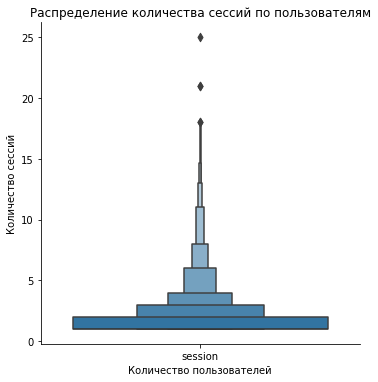

In [20]:
# визуализирую распределение сессий по пользователям
sns.catplot(kind='boxen', data=time_spent)
plt.title('Распределение количества сессий по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество сессий')
plt.show()

**Вывод:** В среднем 1,8 сессии на пользователя за 4 недели, медиана - 1. 
Большенство (75%) посетило приложение 1-2 раза в месяц. Но есть пользователи, которые заходят намного чаще. Самое большое количество дней - 25.

Расчитаю длительность кождой сессии и рассмотрю распределение их времени.

In [21]:
# составлю сводную таблицу и выделю длительность сессий
durations = df.sort_values(['user_id', 'event_time'])
durations['session'] = durations['event_time'].dt.to_period('D')
durations = durations.groupby(['user_id',  'session']).agg({'event_time':['count', 'min', 'max']}).reset_index()
durations.columns = ['user_id', 'session', 'count_time', 'min_time', 'max_time']
durations['duration'] = durations['max_time']-durations['min_time']
durations.head(2)

,user_id,session,count_time,min_time,max_time,duration
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07,9,2019-10-07 13:39:45.989359,2019-10-07 13:49:41.716617,0 days 00:09:55.727258
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-09,4,2019-10-09 18:33:55.577963,2019-10-09 18:42:22.963948,0 days 00:08:27.385985


In [22]:
# посмотрю распределение длительности сесиий
durations['duration'].describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.99])

count                         7817
mean     0 days 01:23:02.002207429
std      0 days 03:10:10.082958971
min                0 days 00:00:00
25%         0 days 00:02:27.479394
50%         0 days 00:11:48.416026
75%         0 days 00:48:44.970514
90%      0 days 04:18:17.362599600
99%      0 days 17:08:01.670624720
max         0 days 23:37:28.666352
Name: duration, dtype: object

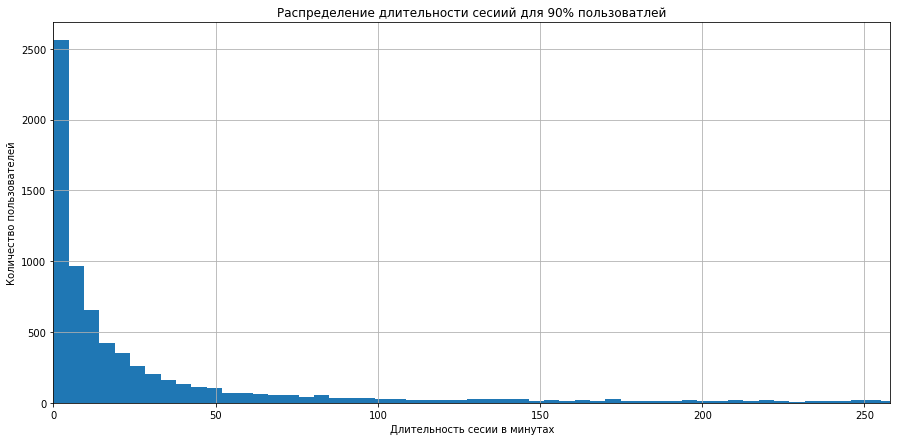

In [23]:
# визуализирую распределение длительности сесиий для 90% пользоватлей
j = (durations['duration'].apply(lambda x:x.total_seconds())) / 60
plt.figure(figsize=(15, 7))
plt.hist(j, bins=300)
plt.xlabel('Длительность сесии в минутах')
plt.ylabel('Количество пользователей')
plt.xlim(0, 258)
plt.grid()
plt.title('Распределение длительности сесиий для 90% пользоватлей')
plt.show()

In [24]:
# посмотрю распределение количества событий
durations['count_time'].describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99])

count    7817.000000
mean        9.491749
std        12.557971
min         1.000000
25%         3.000000
50%         6.000000
75%        11.000000
95%        32.000000
99%        59.000000
max       384.000000
Name: count_time, dtype: float64

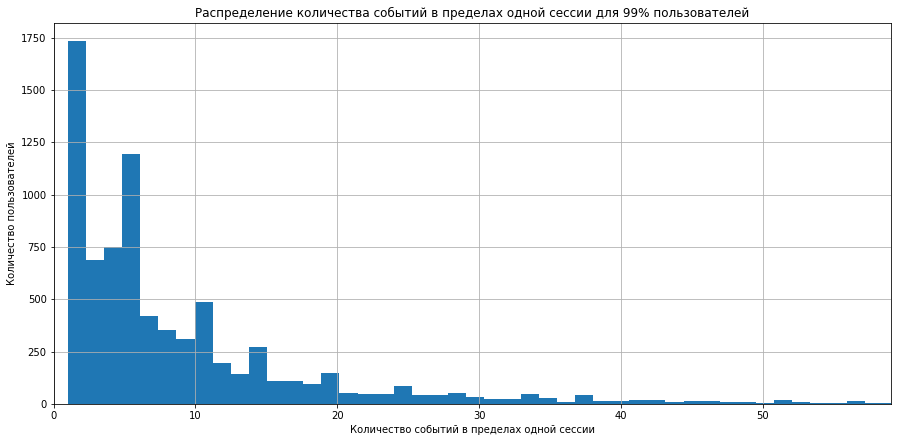

In [25]:
# визуализирую распределение количества событий для 99% пользователей
plt.figure(figsize=(15, 7))
plt.hist(durations['count_time'], bins=300)
plt.xlabel('Количество событий в пределах одной сессии')
plt.ylabel('Количество пользователей')
plt.xlim(0, 59)
plt.grid()
plt.title('Распределение количества событий в пределах одной сессии для 99% пользователей')
plt.show()

**Вывод:** По полученным расчетам видно, что есть нулевые сессии. Середняя сессия длится 1:23:02, а медиана всего почти 12 минут. Такая разница говорит о том, что большая часть сессий короткие, до 1 часа (75% всех сессий длительность до 00:48:45) и 10% сессий от 4 часов 18 минут. При этом совершая в среднем 9,5 событий за сессию (медиана 11).

Для специфики приложения это нормальный результат - примерно за это время пользователь может найти то, что его интресует, рассмотреть варианты и принять решение о покупке. 

In [26]:
# посмотрю события с нулевой сессией
d = durations.query('duration == "0 days 00:00:00"').sort_values(by='user_id')
d.head(2)

,user_id,session,count_time,min_time,max_time,duration
9,00157779-810c-4498-9e05-a1e9e3cedf93,2019-11-03,1,2019-11-03 17:12:09.708771,2019-11-03 17:12:09.708771,0 days
19,00551e79-152e-4441-9cf7-565d7eb04090,2019-10-29,1,2019-10-29 02:17:12.342406,2019-10-29 02:17:12.342406,0 days


Событий с нулевой длительностью довольно-таки много - 994 штук. 

In [27]:
# посмотрю количество событий, совершенных в нулевые сессии
d['count_time'].unique()

array([1])

In [28]:
# какие события в нулевых сессиях
us = durations['user_id'].to_list()
nul = durations.query('duration == "0 days 00:00:00"')['min_time'].to_list()
data = df.query('user_id in @us & event_time in @nul').value_counts('event_name').reset_index()
data

,event_name,0
0,tips_show,392
1,photos_show,248
2,search,194
3,show_contacts,64
4,map,57
5,advert_open,25
6,favorites_add,9
7,tips_click,5


**Вывод:** Событий с нулевой длительностью - 994 штук. Из них лидируют `tips_show`(пользователь увидел рекомендованные объявления) - 392 нулевые сессии, `photos_show` (просмотр фотографий в объявлении) - 248 нлевой сессии и `search` (поиск) - 194 нулевые сессии.

### 3.3 Частота действий.

#### 3.3.1. Частота действий по событиям

In [29]:
# сделаю сводную таблицу по частоте действий за всё известое нам время
action = df.groupby('event_name')['user_id'].count().sort_values(ascending=False).reset_index()
action

,event_name,user_id
0,tips_show,40055
1,photos_show,10012
2,search,6784
3,advert_open,6164
4,show_contacts,4529
5,map,3881
6,favorites_add,1417
7,tips_click,814
8,contacts_call,541


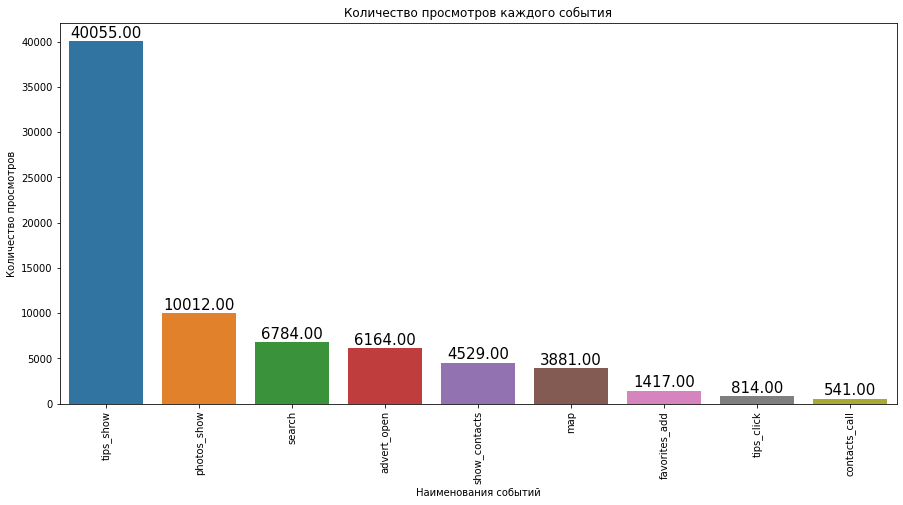

In [30]:
# визуализирую полученную информацию
plt.figure(figsize=(15, 7))
p = sns.barplot(x='event_name', y='user_id', data=action)
for bar in p.patches:
      p.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Количество просмотров каждого события')
plt.xlabel('Наименования событий')
plt.ylabel('Количество просмотров')
plt.xticks(rotation=90)
plt.show()

**Вывод:** Самое высокопосещаемое событие - `tips_show` (пользователь увидел рекомендованные объявления). Их посмотрели за месяц 40055 раз. На основе этого можно предположить, что на главной странице пользователь видит рекомендованные объявления.
Однако, количество события `tips_click` (пользователь кликнул по рекомендованному объявлению) настолько мало - 814 кликов, что это может говорить о том, что рекомендации не очень интересны пользователям. 
    
А при сравнении событий `search` (поиск по сайту) и `advert_open` (открытие карточки объявления) видно, что поиск более популярен среди пользователей. 
    
На втором месте по посещаемости занимает событипе `photos_show` (просмотр фотографий в объявлении). Это говорит о том, что пользователи любят просматривать фотографии.
    
Затем с примерно одинаковыми показателями следуют события `show_contacts` (пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления) и  `map` (пользователь открыл карту размещенных объявлений).
    
Также следует отметить, что пользователи чаще просматривают контакты, чем совершают звонки через приложение. У события `contacts_call` (пользователь позвонил по номеру телефона на карточке объявления) самый низкий показатель. Возможно, пользователи либо звонят "по-старинке", или делятся контактом с родтвенниками.

#### 3.3.1. Частота действий по дням в разрезе по событиям

Дополнительно посмотрю распределение событий по дням в разрезе по событиям, но предварительно исключив `tips_show`, `favorites_add`, `contacts_call`. Просмотр главной страницы затмевает все остальные события, а добавление в избранное и звонки через приложение имеют слишком низкие показатели.

In [31]:
# подготовлю данные и сделаю сводную таблицу
action = (
    sessions.query('event_name != ["tips_show", "favorites_add", "contacts_call"]')
    .groupby(['session','event_name'])
    .agg({'event_time':'count'})
    .reset_index()
)
action['session'] = action['session'].astype (str)

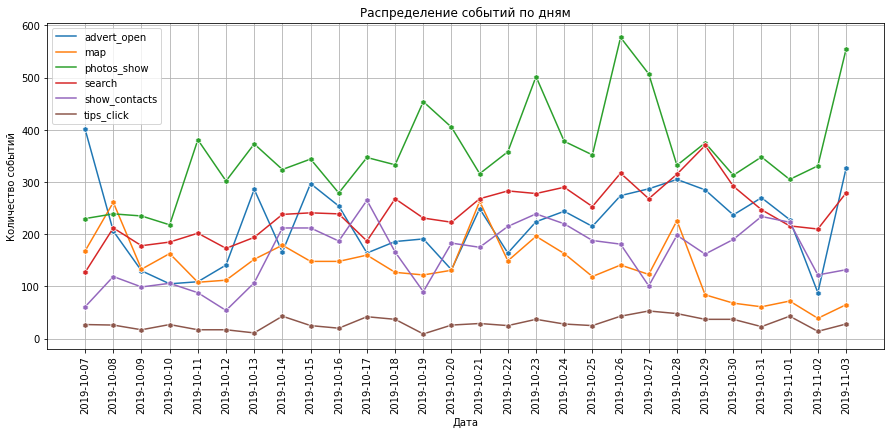

In [32]:
# проиллюстрирую полученную информацию
plt.figure(figsize=(15, 6))
sns.lineplot(x='session', y='event_time', hue='event_name', marker= 'h', data=action)
plt.title('Распределение событий по дням')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.xticks(rotation=90)
plt.legend()
plt.grid()
plt.show()

На графике отчетливо видно, что пользователи очень любят смотреть фотографии. Поиск тоже очень популярен. А кликают по рекомендованным объявлением не охотно. Особо выделяется первый день исследуемого периода - 07-10-2019, когда событие  "просмотр объявлений" показывает особо высокий уровень.
    
Также можно отметить рост активности пользователей до 26 октября 2019 года и далее резкий провал на 6 дней.
    
Что касается нашего целевого события `show_contacts` (пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления), то оно показывает рост на второй неделе и держит показатель примерно на одном уровне, за исключением 4 дней.

### 3.4 Конверсия в целевое действие - просмотр контактов.

#### 3.4.1. Конверсия в целевое событие по каждому пользователю

In [33]:
# составлю сводную таблицу пользователей, которые совершили целевое событие
conversion =(
    df.query('event_name=="show_contacts"')
    .groupby('user_id', as_index=False)
    .agg({'event_name':'count'})
    .rename(columns={'event_name':'show'})
)

In [34]:
# составлю сводную таблицу пользователей и всех событий
total = (
    df.groupby('user_id', as_index=False)
    .agg({'event_time':'count'})
    .rename(columns={'event_time':'visits'})
)

In [35]:
# соеденю две полученные таблицы, заменю пропуски на 0, посчитаю конверсию и отсортирую по убываанию
conversion = pd.merge(total, conversion, on='user_id', how='left')
conversion['show'] = conversion['show'].fillna(0)
conversion['conversion'] = conversion['show'] / conversion['visits']
conversion.sort_values(by='conversion', ascending=False).head(5)

,user_id,visits,show,conversion
504,1aa74691-c80e-47d7-94d2-1701efcad80e,2,2.0,1.0
2331,89db3808-5cc0-4d60-9f96-24a9139c3727,11,11.0,1.0
963,389ba51a-f86f-47ba-8e11-a70e8e92e31e,6,6.0,1.0
3547,d444b122-162d-4ee1-9999-9b439e7faad2,6,6.0,1.0
2216,849b6088-6a7c-4ff7-a3f3-11a5675efaac,18,18.0,1.0


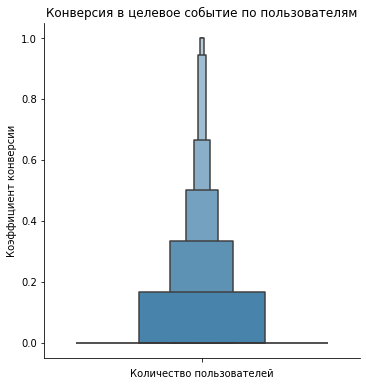

In [36]:
# визуализирую полученные данные
sns.catplot(kind='boxen', y='conversion', data=conversion)
plt.title('Конверсия в целевое событие по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Коэффициент конверсии')
plt.show()

**Вывод:** На графике видно количество пользователей с 0 конверсией, их очень много.

#### 3.4.1. Конверсия в целевое событие по всем пользователям

In [37]:
# посчитаю уникальных пользователей, которые совершили целевое событие
contacts_show_df = df.query('event_name == "show_contacts"')

In [38]:
# посчитаю конверсию всех пользователей
print(f"{(contacts_show_df['user_id'].nunique() / df['user_id'].nunique()):.2%}")

22.85%


**Вывод:** По полученным рультатам до целевого события - просмотр контактов, доходят 22.85% пользователей. Не очень хороший показатель, так как почти 77% это просто зрители. Какие могут быть причины?
- не находит нужного объявления, значит необходимо привлечение новых пользователей;
- при таком огромном количестве просмотров рекондаций, вполне вероятно, что пользователь листает ленту и забывает зачем пришёл в приложение;
- при самостоятельном поиске пользователь охотнее просматривает контакты продаца, но поиском воспользовались мало человек. Возможно поиск "спрятан" и его необходимо перенести в видное место.

## 3. Сегментирование пользователей на основе действий

Для более глубокого анализа я сегментировала посетителей по времени активности. Для катигоризации использовала данные о первом посещении. 
    
Интересно посмотреть в какое время дня посетители чаще заходят в приложение и активнее возвращаются. Возможно, день - это самое удачное время, чтобы поискать нужную вещь, посмотреть контакт и договориться о встрече на вечер. А может лучше утром напомнить пользователю с помощью пуш-уведомления, чтобы по пути на работу зайти в приложение. Интересно, а как себя ведут ночные пользователи?

In [39]:
# для сегментирования пользователей по времени суток добавляю столбец со значением часа
profiles['first_hour'] = profiles['first_time'].dt.hour
profiles['first_hour'] = profiles['first_hour'].astype (int)

In [40]:
# пишу функцию для категоризации данных
def categorize_time(hour):
    try:
        if 6 <= hour <= 11:
            return 'Утро'
        elif 12 <= hour <= 17:
            return 'День'
        elif 18 <= hour <= 23:
            return 'Вечер' 
        elif 0 <= hour <= 5:
            return 'Ночь'
    except:
        pass

In [41]:
# категоризирую данные
profiles['time_of_day'] = profiles['first_hour'].apply(categorize_time)

In [42]:
# вывожу на экран для просмотра результата
profiles.head(2)

,user_id,first_time,show,source,event_time,event_name,activ_week,first_week,lifetime,first_hour,time_of_day
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,False,other,2019-10-07 13:39:45.989359,tips_show,2019-10-07,2019-10-07,0,13,День
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,2019-10-07 13:39:45.989359,False,other,2019-10-07 13:40:31.052909,tips_show,2019-10-07,2019-10-07,0,13,День


In [43]:
# делаю сводную таблицу полученных данных
user = profiles.groupby(['user_id','time_of_day'])['source'].count().reset_index()
user

,user_id,time_of_day,source
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,День,35
1,00157779-810c-4498-9e05-a1e9e3cedf93,Вечер,71
2,00463033-5717-4bf1-91b4-09183923b9df,День,10
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,Вечер,32
4,00551e79-152e-4441-9cf7-565d7eb04090,День,8
...,...,...,...
4288,ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07,День,17
4289,ffc01466-fdb1-4460-ae94-e800f52eb136,Вечер,7
4290,ffcf50d9-293c-4254-8243-4890b030b238,Утро,2
4291,ffe68f10-e48e-470e-be9b-eeb93128ff1a,День,13


In [44]:
# смотрю количество пользователей в группах.
user.groupby('time_of_day')['user_id'].count()

time_of_day
Вечер    1416
День     1713
Ночь      221
Утро      943
Name: user_id, dtype: int64

Распределение по группам получилось не слишком разрозненным. Самая маленькая группа НОЧЬ больше, чем 10% от смой большой группы - ДЕНЬ. 
    
Категоризировала пользователей по часу первого посещения.
    
Сейчас необходимо посчитать Retention Rate и конверсии по полученным группам.

### 3.1. Retention Rate по полученным группам

#### 3.1.1. Группа "утро"

In [47]:
# делаю срез по утренним пользователям
m = profiles.query('time_of_day == "Утро"')
m_users = m['user_id'].to_list()
# расситываю удержание
moning = profiles.query('user_id in @m_users').groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort_sizes_m = (
        profiles.query('user_id in @m_users')
        .groupby('first_week')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
        .reset_index()
    )  
cohorts_m = cohort_sizes_m.merge(moning, on='first_week', how='left').fillna(0)
cohorts_m['retention'] = cohorts_m['user_id']/cohorts_m['cohort_size']

In [48]:
# составлю сводную таблицу удержания по неделям
retention_m = cohorts_m.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum').reset_index()

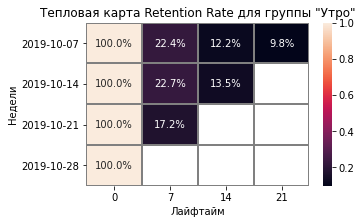

In [49]:
# визуализирую полученные данные
plt.figure(figsize=(5,3))
sns.heatmap(
    cohorts_m.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum'), 
    annot=True, 
    fmt='.1%',
    linewidths=1,
    linecolor='gray'
)
plt.title('Тепловая карта Retention Rate для группы "Утро"')
plt.xlabel('Лайфтайм')
plt.ylabel('Недели')
plt.show()

#### 3.1.2. Группа "день"

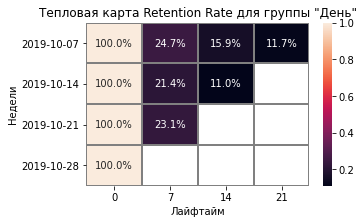

In [50]:
# делаю срез по утренним пользователям
d = profiles.query('time_of_day == "День"')
d_users = d['user_id'].to_list()
# расситываю удержание
day = profiles.query('user_id in @d_users').groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort_sizes_d = (
        profiles.query('user_id in @d_users')
        .groupby('first_week')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
        .reset_index()
    )  
cohorts_d = cohort_sizes_d.merge(day, on='first_week', how='left').fillna(0)
cohorts_d['retention'] = cohorts_d['user_id']/cohorts_d['cohort_size']
# составлю сводную таблицу удержания по неделям
retention_d = cohorts_d.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum').reset_index()
# визуализирую полученные данные
plt.figure(figsize=(5,3))
sns.heatmap(
    cohorts_d.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum'), 
    annot=True, 
    fmt='.1%',
    linewidths=1,
    linecolor='gray'
)
plt.title('Тепловая карта Retention Rate для группы "День"')
plt.xlabel('Лайфтайм')
plt.ylabel('Недели')
plt.show()

#### 3.1.3 Группа "Вечер"

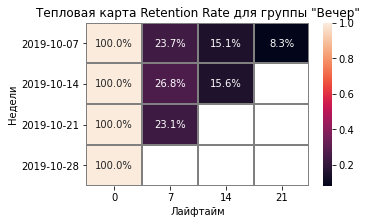

In [51]:
# делаю срез по утренним пользователям
е = profiles.query('time_of_day == "Вечер"')
е_users = е['user_id'].to_list()
# расситываю удержание
evening = profiles.query('user_id in @е_users').groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort_sizes_е = (
        profiles.query('user_id in @е_users')
        .groupby('first_week')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
        .reset_index()
    )  
cohorts_е = cohort_sizes_е.merge(evening, on='first_week', how='left').fillna(0)
cohorts_е['retention'] = cohorts_е['user_id']/cohorts_е['cohort_size']
# составлю сводную таблицу удержания по неделям
retention_е = cohorts_е.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum').reset_index()
# визуализирую полученные данные
plt.figure(figsize=(5,3))
sns.heatmap(
    cohorts_е.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum'), 
    annot=True, 
    fmt='.1%',
    linewidths=1,
    linecolor='gray'
)
plt.title('Тепловая карта Retention Rate для группы "Вечер"')
plt.xlabel('Лайфтайм')
plt.ylabel('Недели')
plt.show()

#### 3.1.4. Группа "Ночь"

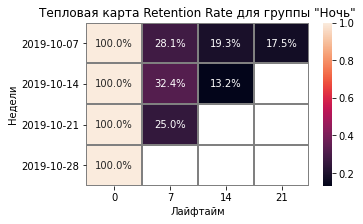

In [52]:

# делаю срез по утренним пользователям
n = profiles.query('time_of_day == "Ночь"')
n_users = n['user_id'].to_list()
# расситываю удержание
night = profiles.query('user_id in @n_users').groupby(['first_week','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohort_sizes_n = (
        profiles.query('user_id in @n_users')
        .groupby('first_week')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
        .reset_index()
    )  
cohorts_n = cohort_sizes_n.merge(night, on='first_week', how='left').fillna(0)
cohorts_n['retention'] = cohorts_n['user_id']/cohorts_n['cohort_size']
# составлю сводную таблицу удержания по неделям
retention_n = cohorts_n.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum').reset_index()
# визуализирую полученные данные
plt.figure(figsize=(5,3))
sns.heatmap(
    cohorts_n.pivot_table(index='first_week',columns='lifetime',values='retention',aggfunc='sum'), 
    annot=True, 
    fmt='.1%',
    linewidths=1,
    linecolor='gray'
)
plt.title('Тепловая карта Retention Rate для группы "Ночь"')
plt.xlabel('Лайфтайм')
plt.ylabel('Недели')
plt.show()

#### 3.1.5. Вывод по Retention Rate по сегментированным группам группам

Группа утренних пользователей полказывает самое плохое удержание. На второй неделе возвращаются 17.2%-22.7% пользователей, а на четвертой всего 9.8%
Самые высокие показатели возвращаемости показывают ночные пользователи. Вторая неделя - 25.0%-32.4%, на четвертой неделе удерживается 17.5%.
Интересная вечерняя группа. На второй неделе показатели не плохи (23.1%-26.8%), но на четвертой неделе самый худший показатель - 8.3%.

По результату исследование оказалось, что самые активные пользователи - ночные. Интересный получитлся результат. На втором месте по активности - вечереняя, но они стали плохо возвращаться на четвертой неделе, необходимо обратить на них внимание. Утро и день не оправдали ожидание.

**Целевую группу по Retention Rate** рекомендую выбрать вечернюю. У неё хороший показатель на второй неделе, но на четвертой самый низкий показатель. Группе вечерних пользователей рекомендую рассылать пуш-уведомления. **Альтернативная группа** - утреняя. пользователи этой группы неохотно возвращаются в приложение. Им тоже рассылаем пуш-уведомления.

### 3.2. Конверсия в целевое действие - просмотр контактов по полученным группам

#### 3.2.1. Группа "Утро"

In [53]:
# посчитаю уникальных пользователей, которые совершили целевое событие утром
contacts_show_df_m = profiles.query('event_name == "show_contacts" & time_of_day == "Утро"')
df_m = profiles.query('time_of_day == "Утро"')
# посчитаю конверсию всех пользователей
print(f"{(contacts_show_df_m['user_id'].nunique() / df_m['user_id'].nunique()):.2%}")

23.22%


#### 3.2.2. Группа "День"

In [54]:
# посчитаю уникальных пользователей, которые совершили целевое событие днём
contacts_show_df_d = profiles.query('event_name == "show_contacts" & time_of_day == "День"')
df_d = profiles.query('time_of_day == "День"')
# посчитаю конверсию всех пользователей
print(f"{(contacts_show_df_d['user_id'].nunique() / df_d['user_id'].nunique()):.2%}")

24.52%


#### 3.2.3. Группа "Вечер"

In [55]:
# посчитаю уникальных пользователей, которые совершили целевое событие вечером
contacts_show_df_e = profiles.query('event_name == "show_contacts" & time_of_day == "Вечер"')
df_e = profiles.query('time_of_day == "Вечер"')
# посчитаю конверсию всех пользователей
print(f"{(contacts_show_df_e['user_id'].nunique() / df_e['user_id'].nunique()):.2%}")

21.33%


#### 3.2.4. Группа "Ночь"

In [56]:
# посчитаю уникальных пользователей, которые совершили целевое событие ночью
contacts_show_df_n = profiles.query('event_name == "show_contacts" & time_of_day == "Ночь"')
df_n = profiles.query('time_of_day == "Ночь"')
# посчитаю конверсию всех пользователей
print(f"{(contacts_show_df_n['user_id'].nunique() / df_n['user_id'].nunique()):.2%}")

18.10%


#### 3.2.5. Вывод по конверсиям в целевое действие по сегментированным группам

Самый высокий показатель конверсии в целевое действие показала группа дневных пользователей - 24.52%. Немного поменьше утренняя группа - 23.22% и вечерняя - 21.33%. Самый низкий показатель у ночной группы - 18.10%.

Как и предпологала, днём лучше смотрят контакты продавца. На втором месте утренние пользователи, как раз и необходимо "позвать" в приложение.

**Целевую группу по конверсии** в целевое событие рекомендую выбрать утреннюю. Предлагаю отправлять пуш-уведомления о появлении новых объявлений из группы поиска и/или напоминание об избранном. **Альтернативная группа** - вечерняя.

## 5. Проверика гипотез

### 5.1. Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. 
* Нулевая гипотеза: Две группы пользователей из yandex и из google не имеют статистической разницы в конверсиях в просмотры контактов. 
* Альтернативная гипотеза: две эти группы имеют статистическую разницу в конверсиях в просмотры контактов

In [57]:
# составлю сводную таблицу по каналам установки приложения
results = df.query('source != "other" & event_name == "show_contacts"').groupby('source').agg({'user_id': 'nunique'})
results.columns = ['users_show']
results['users_group'] = df.query('source != "other"').groupby('source').agg({'user_id': 'nunique'})
results['percent'] = ((results['users_show'] / results['users_group']) * 100).round(2)
results

,users_show,users_group,percent
source,,,
google,275,1129,24.36
yandex,478,1934,24.72


In [58]:
# напишу функцию для расчета Z-критерия
def z_test (results, group_1, group_2):
    # пропорция успехов в первой группе:
    p1 = results.loc[group_1,'users_show']/results.loc[group_1,'users_group']
    # пропорция успехов во второй группе:
    p2 = results.loc[group_2,'users_show']/results.loc[group_2,'users_group']
    # пропорция успехов в комбинированном датасете:
    p_combined = ((results.loc[group_1,'users_show'] + results.loc[group_2,'users_show']) / 
              (results.loc[group_1,'users_group'] + results.loc[group_2,'users_group']))
    # разница пропорций в датасетах
    difference = p1 - p2 
    # считаю статистику в ст.отклонениях стандартного нормального распределения
    z_value = (difference / mth.sqrt(p_combined * (1 - p_combined) * (1/results.loc[group_1,'users_group'] 
                                                                 + 1/results.loc[group_2,'users_group'])))
    # задаю стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными') 

In [59]:
# рассчитаю Z критерий для гипотезы
alpha = 0.05
z_test (results, 'google', 'yandex')

p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Не получилось отвергнуть нулевую гипотезу - две группы пользователей из yandex и из google не имеют статистической разницы в конверсиях в просмотры контактов.

### 5.2 Одни пользователи совершают действия tips_show и tips_click, другие — только tips_show.
- Нулевая гипотеза: Две группы пользователей не имеют статистической разницы в конверсиях в просмотры контактов.
- Альтернативная гипотеза: две эти группы имеют статистическую разницу в конверсиях в просмотры контактов.

In [60]:
# составляю сводную таблицу первой группы
df_2 = df.query('event_name == ["tips_show", "tips_click", "show_contacts"]')

results_2 = df_2.query('event_name != "show_contacts"')
results_2 = results_2.replace(['tips_show', 'tips_click'], 'tips_show+tips_click')
results_2 = results_2.groupby('event_name').agg({'user_id': 'nunique'})
results_2.columns = ['users_group']
results_2['users_show'] = df_2.query('event_name == "show_contacts"')['user_id'].nunique()

results_2['percent'] = ((results_2['users_show'] / results_2['users_group']) * 100).round(2)
results_2

,users_group,users_show,percent
event_name,,,
tips_show+tips_click,2826,981,34.71


In [61]:
# составляю своную таблицу второй группы
results_3 = df_2.query('event_name == "tips_show"').groupby('event_name').agg({'user_id': 'nunique'})
results_3.columns = ['users_group']
df_3 = df_2.query('event_name != "tips_click"')
results_3['users_show'] = df_3.query('event_name == "show_contacts"')['user_id'].nunique()
results_3['percent'] = ((results_3['users_show'] / results_3['users_group']) * 100).round(2)
results_3

,users_group,users_show,percent
event_name,,,
tips_show,2801,981,35.02


In [62]:
# объединяю две полученные таблицы для проведения z теста
stat = pd.concat([results_2, results_3])
stat[['users_show', 'users_group', 'percent']]
new_stat = stat[['users_show', 'users_group', 'percent']]
new_stat

,users_show,users_group,percent
event_name,,,
tips_show+tips_click,981,2826,34.71
tips_show,981,2801,35.02


In [63]:
# рассчитаю Z критерий для гипотезы
z_test (new_stat, 'tips_show+tips_click', 'tips_show')

p-значение:  0.8073489125242999
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Не получилось отвергнуть нулевую гипотезу -  Две группы пользователей не имеют статистической разницы в конверсиях в просмотры контактов​.

### 5.3 Одни пользователи совершают действия tips_show и tips_click, другие — search и advert_open.
- Нулевая гипотеза: Две группы пользователей не имеют статистической разницы в конверсиях в просмотры контактов.
- Альтернативная гипотеза: две эти группы имеют статистическую разницу в конверсиях в просмотры контактов.

In [64]:
# сводная таблица первой группы
results_2

,users_group,users_show,percent
event_name,,,
tips_show+tips_click,2826,981,34.71


In [65]:
# сводная таблица второй группы
df_4 = df.query('event_name == ["search", "advert_open", "show_contacts"]')
results_4 = df_4.query('event_name != "show_contacts"')
results_4 = results_4.replace(['search', 'advert_open'], 'search+advert_open')
results_4 = results_4.groupby('event_name').agg({'user_id': 'nunique'})
results_4.columns = ['users_group']
results_4['users_show'] = df_4.query('event_name == "show_contacts"')['user_id'].nunique()

results_4['percent'] = ((results_4['users_show'] / results_4['users_group']) * 100).round(2)
results_4

,users_group,users_show,percent
event_name,,,
search+advert_open,2078,981,47.21


In [66]:
# объединяю две полученные таблицы для проведения z теста
stat_2 = pd.concat([results_2, results_4])
stat_2[['users_show', 'users_group', 'percent']]
new_stat_2 = stat_2[['users_show', 'users_group', 'percent']]
new_stat_2

,users_show,users_group,percent
event_name,,,
tips_show+tips_click,981,2826,34.71
search+advert_open,981,2078,47.21


In [67]:
# рассчитаю Z критерий для гипотезы
z_test (new_stat_2, 'tips_show+tips_click', 'search+advert_open')

p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


Гипотеза о равенстве групп имеет статистически значимые различия, значит две группы пользователей имею разную конверсию в просмотры.

## 6. Общий вывод и рекомендации

**ОБЩИЙ ВЫВОД:**
- Показатель Retention Rate для посетителей приложения за месяц падает. И с каждой новой когортой поведение пользователей меняется. Необходимо выяснить, какие именно факторы влияют на отток пользователей.
- При расчете времени, которое пользователи проводят в приложении, за одну сессию я взала в расчет один день. Полагаю, что пользователь может искать нужную вещь с перерывом. За завтраком, в транспорте, в такси, во время перерыва на работе. И в конце концов находит то, что нужно. Так вот в среднем 1,8 сессии на пользователя за 4 недели, медиана - 1. Большенство (75%) посетило приложение 1-2 раза в месяц. Но есть пользователи, которые заходят намного чаще. Самое большое количество дней - 25.
- Середняя сессия длится 1:23:02, а медиана всего почти 12 минут. Такая разница говорит о том, что большая часть сессий короткие, до 1 часа (75% всех сессий длительность до 00:48:45) и 10% сессий от 4 часов 18 минут. При этом совершая в среднем 9,5 событий за сессию (медиана 11). Для специфики приложения это нормальный результат - примерно за это время пользователь может найти то, что его интресует, рассмотреть варианты и принять решение о покупке. 
- Событий с нулевой длительностью - 994 штук. Из них лидируют `tips_show` (пользователь увидел рекомендованные объявления) - 392 нулевые сессии, `photos_show` (просмотр фотографий в объявлении) - 248 нлевой сессии и `search` (поиск по сайту) - 194 нулевые сессии.
- Самое высокопосещаемое событие - `tips_show` (пользователь увидел рекомендованные объявления). Их посмотрели за месяц 40055 раз. На основе этого можно предположить, что на главной странице пользователь видит рекомендованные объявления. Однако, количество события `tips_click` (пользователь кликнул по рекомендованному объявлению) настолько мало - 814 кликов, что это может говорить о том, что рекомендации не очень интересны пользователям. 
- А при сравнении событий `search` (поиск по сайту) и `advert_open` (открытие карточки объявления) видно, что поиск более популярен среди пользователей. 
- На втором месте по посещаемости занимает событие `photos_show` (просмотр фотографий в объявлении). Это говорит о том, что пользователи любят просматривать фотографии.
- Затем с примерно одинаковыми показателями следуют события `show_contacts` (пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления) и  `map` (пользователь открыл карту размещенных объявлений).
- Также следует отметить, что пользователи чаще просматривают контакты, чем совершают звонки через приложение. У события `contacts_call` (пользователь позвонил по номеру телефона на карточке объявления) самый низкий показатель. Возможно, пользователи либо звонят "по-старинке", или делятся контактом с родтвенниками.
- График распределения событий по дням так же показыввает интерес пользователей к фотографиям. Поиск тоже очень популярен. А кликают по рекомендованным объявлением не охотно. Особо выделяется первый день исследуемого периода - 07-10-2019, когда событие "просмотр объявлений" показывает особо высокий уровень.
- Также можно отметить рост активности пользователей до 26 октября 2019 года и далее резкий провал на 6 дней.
- Что касается нашего целевого события `show_contacts` (пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления), то оно показывает рост на второй неделе и держит показатель примерно на одном уровне, за исключением 4 дней.
- Конверсия в целевое событие по пользователям показывает, что велико количество пользователей с 0 конверсией.
- По полученным рультатам до целевого события - просмотр контактов, доходят 22.85% от всех пользователей. Не очень хороший показатель, так как почти 77% это просто зрители. Какие могут быть причины?
    - не находит нужного объявления, значит необходимо привлечение новых пользователей;
    - при таком огромном количестве просмотров рекондаций, вполне вероятно, что пользователь листает ленту и забывает зачем пришёл в приложение;
    - при самостоятельном поиске пользователь охотнее просматривает контакты продаца, но поиском воспользовались мало человек. Возможно поиск "спрятан" и его необходимо перенести в видное место.

Для более глубокого анализа я сегментировала посетителей по времени активности в приложении. Для катигоризации использовала данные о первом посещении. В итоге распределение по группам получилось не слишком разрозненным. Самая маленькая группа НОЧЬ больше, чем 10% от самой большой группы - ДЕНЬ.
- Retention Rate группы утренних пользователей показывает самый плохой показатель. На второй неделе возвращаются 17.2%-22.7% пользователей, а на четвертой всего 9.8%. Самые высокие показатели возвращаемости показывают ночные пользователи. Вторая неделя - 25.0%-32.4%, на четвертой неделе удерживается 17.5%. Интересная вечерняя группа. На второй неделе показатели не плохи (23.1%-26.8%), но на четвертой неделе самый худший показатель - 8.3%.
- По конверсии в целевое действие самый высокий показатель показала группа дневных пользователей - 24.52%. Немного поменьше утренняя группа - 23.22% и вечерняя - 21.33%. Самый низкий показатель у ночной группы - 18.10%.
    
Первая гипотеза: Некоторые пользователи установили приложение по ссылке из yandex, другие — из google.
- Нулевая гипотеза: Две группы пользователей из yandex и из google не имеют статистической разницы в конверсиях в просмотры контактов.
- Альтернативная гипотеза: две эти группы имеют статистическую разницу в конверсиях в просмотры контактов.    
Проверка гипотезы о равенстве групп показала, что мы не можем отвергнуть нулевую гипотезу (не имеют статистической разницы в конверсиях в просмотры контактов), нет оснований считать группы разными.

Вторая гипотеза: Одни пользователи совершают действия `tips_show` и `tips_click`, другие — только `tips_show`.
- Нулевая гипотеза: Две группы пользователей не имеют статистической разницы в конверсиях в просмотры контактов.
- Альтернативная гипотеза: две эти группы имеют статистическую разницу в конверсиях в просмотры контактов.
Проверка гипотезы о равенстве групп показала, что мы не можем отвергнуть нулевую гипотезу (две группы пользователей не имеют статистической разницы в конверсиях в просмотры контактов), нет оснований считать группы разными.

Третья гипотеза: Одни пользователи совершают действия `tips_show` и `tips_click`, другие — `search` и `advert_open`.
- Нулевая гипотеза: Две группы пользователей не имеют статистической разницы в конверсиях в просмотры контактов.
- Альтернативная гипотеза: две эти группы имеют статистическую разницу в конверсиях в просмотры контактов.
Проверка гипотезы о равенстве групп показала, что мы можем отвергнуть нулевую гипотезу (две группы пользователей не имеют статистической разницы в конверсиях в просмотры контактов), есть основания считать группы разными.

**РЕКОМЕНДАЦИИ:**
- Поиск более популярен среди пользователей, а по рекомендованным объявлением кликают не охотно. Также очень важно, что при самостоятельном поиске пользователь охотнее просматривает контакты продавца (это подтвертилось проверкой третьей гипотезы), но поиском воспользовались мало человек. Возможно поиск "спрятан" и его необходимо перенести в видное место.
- До целевого события - просмотр контактов, доходят 22.85% от всех пользователей. Не очень хороший показатель, так как почти 77% это просто зрители. Возможно они просто не находят нужного объявления, значит необходимо привлечение новых пользователей, которые будут размещать объявления о продажи.
- При таком огромном количестве просмотров рекомендаций, вполне вероятно, что пользователь листает ленту и забывает зачем пришёл в приложение. Можно рекомендовать ограничить ленту и показывать только несколько варантов одной категории товаров.
- Целевую группу по Retention Rate рекомендую выбрать вечернюю. У неё хороший показатель на второй неделе, но на четвертой самый низкий показатель. Группе вечерних пользователей рекомендую рассылать пуш-уведомления. Альтернативная группа - утреняя. пользователи этой группы неохотно возвращаются в приложение. Им тоже рассылаем пуш-уведомления.
- Целевую группу по конверсии в целевое событие рекомендую выбрать утреннюю. Предлагаю отправлять пуш-уведомления о появлении новых объявлений из группы поиска и/или напоминание об избранном. Альтернативная группа - вечерняя. 